<a href="https://colab.research.google.com/github/lushukai/enterprise-risk/blob/master/NUS_FT_ML_TA_LuShuKai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import psycopg2 as ps

tesla = pd.read_excel('tesla.xlsx', header=0, index_col=0)
print(tesla)

                          Close
Date                           
2019-06-03 16:00:00.288  178.97
2019-06-04 16:00:00.288  193.60
2019-06-05 16:00:00.288  196.59
2019-06-06 16:00:00.288  205.95
2019-06-07 16:00:00.288  204.50
...                         ...
2020-05-22 16:00:00.288  816.88
2020-05-26 16:00:00.288  818.87
2020-05-27 16:00:00.288  820.23
2020-05-28 16:00:00.288  805.81
2020-05-29 16:00:00.288  835.00

[251 rows x 1 columns]


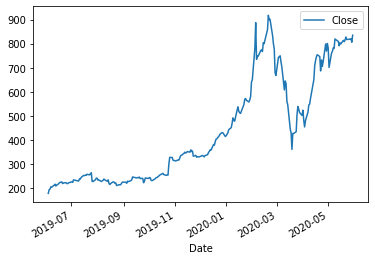

In [141]:
#Q1
tesla.plot()
#Not enough information to deduce seasonality due to time frame of only a year.
#Seasonality is defined as a repeating pattern within a year.

In [142]:
#Q2 VALIDATED
sd_tesla = np.std(tesla.iloc[:,0])
print(sd_tesla)

218.9943835129397


In [143]:
#Q3 VALIDATED
max_tesla = max(tesla.iloc[:,0])
print(max_tesla)

917.42


In [144]:
#Q4 (Did not mention if wanted string or datetime datatype) VALIDATED
index_max = str(tesla[tesla['Close']==max_tesla].index.values[0])[0:10].replace('-','/')
print(index_max)

2020/02/19


In [145]:
#Q5 (Short sell means sell first, buy back later) VALIDATED
range_tesla = tesla.iloc[:,0]
profit = 0
for i in range(len(range_tesla)):
  for j in range(i+1,len(range_tesla)):
    if range_tesla[i] - range_tesla[j] > profit:
      profit = range_tesla[i] - range_tesla[j]
      index_i = str(tesla[tesla['Close']==range_tesla[i]].index.values[0])[0:10].replace('-','/')
      index_j = str(tesla[tesla['Close']==range_tesla[j]].index.values[0])[0:10].replace('-','/')
      
print(profit, index_i, index_j)

556.1999999999999 2020/02/19 2020/03/18


In [146]:
#Q6 VALIDATED
tesla['Signal'] = tesla['Close'].pct_change() > 0
print(tesla['Signal'].value_counts())

True     142
False    109
Name: Signal, dtype: int64


In [147]:
#Q7 VALIDATED
tesla['Days'] = tesla.index.day
tesla['Prediction'] = tesla['Days'].apply(lambda x: 'SELL' if x % 2 == 0 else 'BUY')
print(tesla['Prediction'])

Date
2019-06-03 16:00:00.288     BUY
2019-06-04 16:00:00.288    SELL
2019-06-05 16:00:00.288     BUY
2019-06-06 16:00:00.288    SELL
2019-06-07 16:00:00.288     BUY
                           ... 
2020-05-22 16:00:00.288    SELL
2020-05-26 16:00:00.288    SELL
2020-05-27 16:00:00.288     BUY
2020-05-28 16:00:00.288    SELL
2020-05-29 16:00:00.288     BUY
Name: Prediction, Length: 251, dtype: object


In [148]:
#Q8 (If you bought today and the price increase tomorrow, correct & vice-versa)
#Therefore, the current BUY -> next True & current SELL -> next False.
# print(tesla[['Signal','Prediction']])
tesla['Signal2'] = tesla['Signal'].shift(-1)
tesla['results'] = np.where(((tesla['Prediction']=='BUY') & (tesla['Signal2']==True)) |
                            ((tesla['Prediction']=='SELL') & (tesla['Signal2']==False)),
                            True, False)
print(tesla['results'].value_counts())
Accuracy = 115/251
print('{:.3%}'.format(Accuracy))

False    136
True     115
Name: results, dtype: int64
45.817%
